In [1]:
# importation des librairies nécéssaires
import pandas as pd 
import numpy as np

dataset_conso = pd.read_csv('DAYTON_hourly.csv')
dataset_temp = pd.read_csv('OHDAYTON.csv',index_col=['Datetime'])
dataset_conso = dataset_conso.set_index('Datetime')
dataset_conso.index = pd.to_datetime(dataset_conso.index)

In [2]:
dataset_conso

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596.0
2004-12-31 02:00:00,1517.0
2004-12-31 03:00:00,1486.0
2004-12-31 04:00:00,1469.0
2004-12-31 05:00:00,1472.0
...,...
2018-01-01 20:00:00,2732.0
2018-01-01 21:00:00,2724.0
2018-01-01 22:00:00,2664.0


In [3]:
dataset_conso.info()
dataset_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121275 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DAYTON_MW  121275 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
<class 'pandas.core.frame.DataFrame'>
Index: 9265 entries, 1995-01-01 to 2020-05-13
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  9265 non-null   float64
dtypes: float64(1)
memory usage: 144.8+ KB


In [4]:
# comptage des valeurs manquantes
dataset_conso.isnull().sum()
dataset_temp.isnull().sum()

Temperature    0
dtype: int64

In [5]:
dataset_temp

,Temperature
Datetime,
1995-01-01,39.0
1995-01-02,19.6
1995-01-03,20.6
1995-01-04,11.3
1995-01-05,6.8
...,...
2020-05-09,39.9
2020-05-10,49.0
2020-05-11,42.7


<AxesSubplot:title={'center':'temperature.csv'}, xlabel='Datetime'>

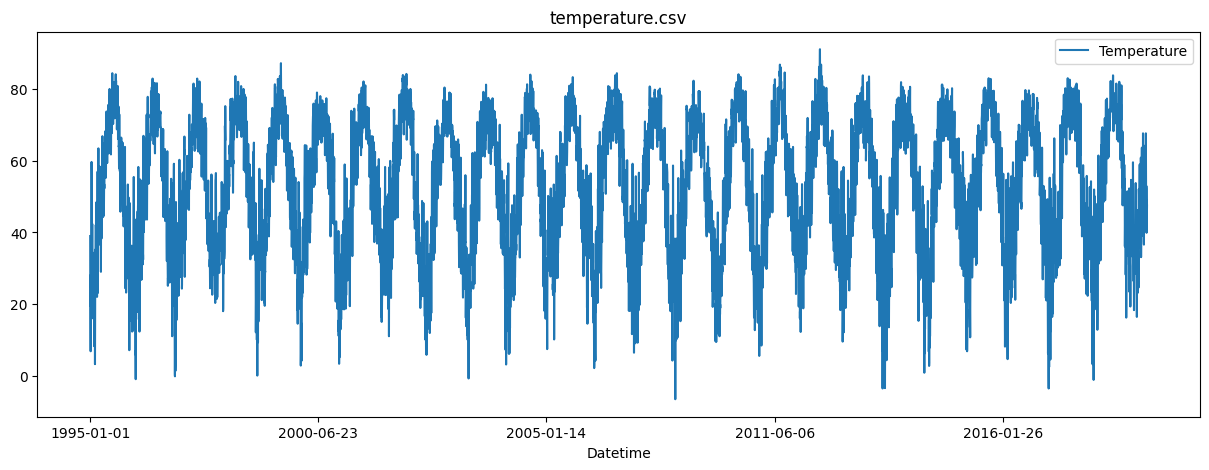

In [6]:
dataset_temp.plot(title='temperature.csv',figsize=(15,5))

<AxesSubplot:title={'center':'Consommation électrique en MW'}, xlabel='Datetime'>

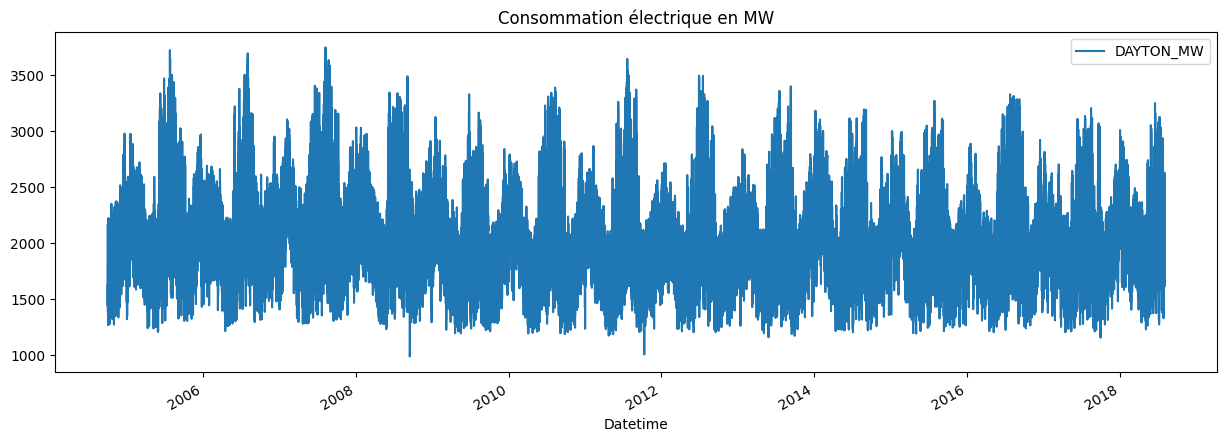

In [7]:
dataset_conso.plot(figsize=(15,5),title='Consommation électrique en MW')

In [8]:
#split train et test
nb_lines = dataset_conso.shape[0]
train = dataset_conso.iloc[:int(nb_lines*0.8)]
test = dataset_conso.iloc[int(nb_lines*0.8)+1:]

In [9]:
dataset_conso

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596.0
2004-12-31 02:00:00,1517.0
2004-12-31 03:00:00,1486.0
2004-12-31 04:00:00,1469.0
2004-12-31 05:00:00,1472.0
...,...
2018-01-01 20:00:00,2732.0
2018-01-01 21:00:00,2724.0
2018-01-01 22:00:00,2664.0


In [10]:
dataset_temp

,Temperature
Datetime,
1995-01-01,39.0
1995-01-02,19.6
1995-01-03,20.6
1995-01-04,11.3
1995-01-05,6.8
...,...
2020-05-09,39.9
2020-05-10,49.0
2020-05-11,42.7


In [11]:
# resampling par jour
daily_groups = dataset_conso.resample('D')
dataset_conso_daily = daily_groups.sum()  

In [12]:
dataset_conso_daily


,DAYTON_MW
Datetime,
2004-10-01,44255.0
2004-10-02,39398.0
2004-10-03,36689.0
2004-10-04,46237.0
2004-10-05,47283.0
...,...
2018-07-30,48632.0
2018-07-31,49226.0
2018-08-01,49447.0


In [84]:
#comptage du nombre de lignes
nb_lines = dataset_conso_daily.shape[0]
nb_lines_t = dataset_temp.shape[0]
(nb_lines,nb_lines_t)

(5055, 9265)

9265